In [5]:
%config Completer.use_jedi = False

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [7]:
df = pd.read_excel('Data_Train.xlsx')

In [8]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [9]:
df.shape

(10683, 11)

<AxesSubplot:xlabel='Additional_Info'>

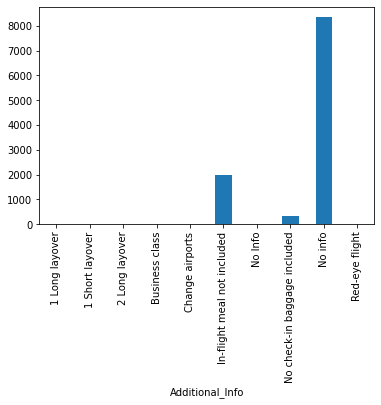

In [10]:
df.groupby(['Additional_Info'])['Additional_Info'].count().plot(kind='bar')

In [11]:
df.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [13]:
df.shape

(10683, 11)

In [14]:
df.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [15]:
df[df['Total_Stops'].isnull()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
9039,Air India,6/05/2019,Delhi,Cochin,NaN,09:45,09:25 07 May,23h 40m,NaN,No info,7480


In [16]:
df.dropna(inplace=True)

In [17]:
df.shape

(10682, 11)

In [18]:
df.groupby(['Airline'])['Airline'].count()/df.shape[0]*100

Airline
Air Asia                              2.986332
Air India                            16.392061
GoAir                                 1.816139
IndiGo                               19.219247
Jet Airways                          36.032578
Jet Airways Business                  0.056169
Multiple carriers                    11.196405
Multiple carriers Premium economy     0.121700
SpiceJet                              7.657742
Trujet                                0.009362
Vistara                               4.484179
Vistara Premium economy               0.028085
Name: Airline, dtype: float64

In [19]:
df['Airline'].value_counts(normalize=True)*100

Jet Airways                          36.032578
IndiGo                               19.219247
Air India                            16.392061
Multiple carriers                    11.196405
SpiceJet                              7.657742
Vistara                               4.484179
Air Asia                              2.986332
GoAir                                 1.816139
Multiple carriers Premium economy     0.121700
Jet Airways Business                  0.056169
Vistara Premium economy               0.028085
Trujet                                0.009362
Name: Airline, dtype: float64

In [20]:
data = df.copy()

In [21]:
data.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662


In [22]:
def change_into_datetime(date_str: str):
    return pd.to_datetime(date_str)
    

In [23]:
for col in ['Date_of_Journey', 'Dep_Time', 'Arrival_Time']:
    data[col] = data[col].map(lambda x: change_into_datetime(x))

In [24]:
data['journey_year'] = data['Date_of_Journey'].dt.year

In [25]:
data['journey_month'] = data['Date_of_Journey'].dt.month

In [26]:
data['journey_day'] = data['Date_of_Journey'].dt.day

In [27]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,journey_year,journey_month,journey_day
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2022-05-16 22:20:00,2022-03-22 01:10:00,2h 50m,non-stop,No info,3897,2019,3,24
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,2022-05-16 05:50:00,2022-05-16 13:15:00,7h 25m,2 stops,No info,7662,2019,1,5
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,2022-05-16 09:25:00,2022-06-10 04:25:00,19h,2 stops,No info,13882,2019,9,6
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,2022-05-16 18:05:00,2022-05-16 23:30:00,5h 25m,1 stop,No info,6218,2019,12,5
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,2022-05-16 16:50:00,2022-05-16 21:35:00,4h 45m,1 stop,No info,13302,2019,1,3


In [28]:
data.drop('Date_of_Journey', axis=1, inplace=True)

In [29]:
def extract_hour_min(df, col):
    df[col+'_hour']  = df[col].dt.hour
    df[col+'_minute'] = df[col].dt.minute
    df.drop(col, axis=1, inplace=True)
    return df

In [30]:
def shift(hour: int)-> str:
    if(hour >= 0 and hour < 4 ):
        return 'Late night'
    if(hour >= 4 and hour< 8):
        return 'Early Morning'
    if(hour >=8 and hour < 12):
        return 'Morning'
    if(hour>=12 and hour < 16):
        return 'Noon'
    if(hour>= 16 and hour < 20):
        return 'Evening'
    else:
        return 'Night'


In [31]:
for col in ['Dep_Time', 'Arrival_Time']:
    data = extract_hour_min(data, col)

In [32]:
data.dtypes

Airline                object
Source                 object
Destination            object
Route                  object
Duration               object
Total_Stops            object
Additional_Info        object
Price                   int64
journey_year            int64
journey_month           int64
journey_day             int64
Dep_Time_hour           int64
Dep_Time_minute         int64
Arrival_Time_hour       int64
Arrival_Time_minute     int64
dtype: object

In [33]:
data['journey_month'].apply(lambda x: x+20).value_counts()

26    2535
23    2211
25    2074
29    1406
21    1075
32     957
24     424
Name: journey_month, dtype: int64

<AxesSubplot:>

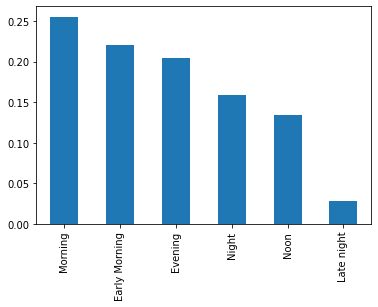

In [34]:
data['Dep_Time_hour'].apply(lambda x: shift(x)).value_counts(normalize=True).plot(kind='bar')

In [35]:
data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,journey_year,journey_month,journey_day,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,2019,3,24,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,2019,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,2019,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,2019,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,2019,1,3,16,50,21,35


In [36]:
def process_duration(x):
    if 'h' not in x:
        x = '0h '+x
    if 'm' not in x:
        x = x+ ' 0m'
    return x

In [37]:
def extract_hour_min(df, col):
    df[col+'_hour'] = df[col].apply(lambda x: int(x.split(' ')[0][0:-1]))
    df[col+'_min'] = df[col].apply(lambda x: int(x.split(' ')[1][0:-1]))
    df.drop(col, axis=1, inplace=True)
    return df

In [38]:
data['Duration'] = data['Duration'].apply(lambda x: process_duration(x))

In [39]:
data = extract_hour_min(data, 'Duration')

In [40]:
data.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,journey_year,journey_month,journey_day,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hour,Duration_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,2019,3,24,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,2019,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,2019,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,2019,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,2019,1,3,16,50,21,35,4,45


In [41]:
data['Duration_total_mins'] = data['Duration_hour']*60 + data['Duration_min']

In [42]:
data.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,journey_year,journey_month,journey_day,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hour,Duration_min,Duration_total_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,2019,3,24,22,20,1,10,2,50,170
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,2019,1,5,5,50,13,15,7,25,445
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,2019,9,6,9,25,4,25,19,0,1140
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,2019,12,5,18,5,23,30,5,25,325
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,2019,1,3,16,50,21,35,4,45,285


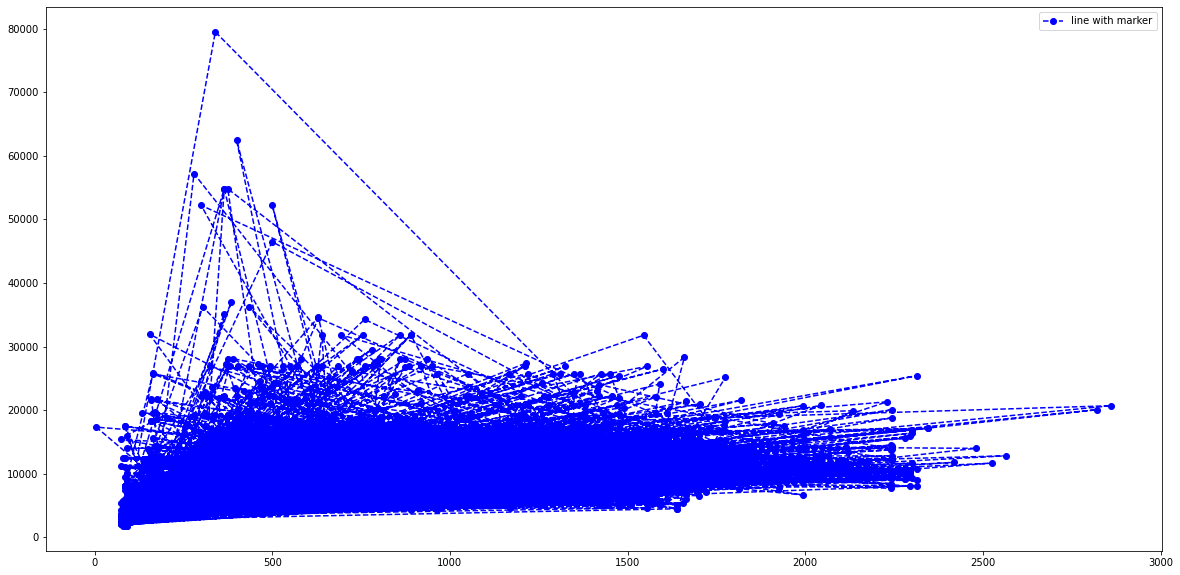

In [43]:
plt.figure(figsize=(20,10))
plt.plot(data['Duration_total_mins'], data['Price'], '--bo', label='line with marker')
plt.legend()


In [44]:
data['Duration_total_mins'].corr(data['Price'])

0.5064797615628507

<Figure size 1440x720 with 0 Axes>

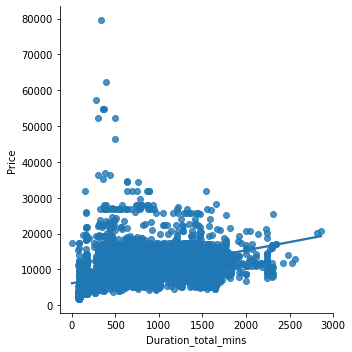

In [45]:
plt.figure(figsize=(20,10))
ax = sns.lmplot(x="Duration_total_mins", y="Price", data=data)


In [46]:
data.head(1)

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,journey_year,journey_month,journey_day,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hour,Duration_min,Duration_total_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,2019,3,24,22,20,1,10,2,50,170


<AxesSubplot:ylabel='Destination'>

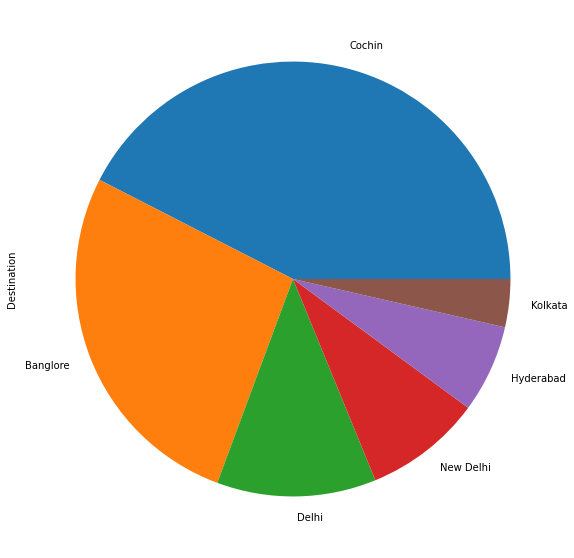

In [47]:
plt.figure(figsize=(20,10))
data['Destination'].value_counts().plot(kind='pie')

In [48]:
list(data['Route'].unique())

['BLR → DEL',
 'CCU → IXR → BBI → BLR',
 'DEL → LKO → BOM → COK',
 'CCU → NAG → BLR',
 'BLR → NAG → DEL',
 'CCU → BLR',
 'BLR → BOM → DEL',
 'DEL → BOM → COK',
 'DEL → BLR → COK',
 'MAA → CCU',
 'CCU → BOM → BLR',
 'DEL → AMD → BOM → COK',
 'DEL → PNQ → COK',
 'DEL → CCU → BOM → COK',
 'BLR → COK → DEL',
 'DEL → IDR → BOM → COK',
 'DEL → LKO → COK',
 'CCU → GAU → DEL → BLR',
 'DEL → NAG → BOM → COK',
 'CCU → MAA → BLR',
 'DEL → HYD → COK',
 'CCU → HYD → BLR',
 'DEL → COK',
 'CCU → DEL → BLR',
 'BLR → BOM → AMD → DEL',
 'BOM → DEL → HYD',
 'DEL → MAA → COK',
 'BOM → HYD',
 'DEL → BHO → BOM → COK',
 'DEL → JAI → BOM → COK',
 'DEL → ATQ → BOM → COK',
 'DEL → JDH → BOM → COK',
 'CCU → BBI → BOM → BLR',
 'BLR → MAA → DEL',
 'DEL → GOI → BOM → COK',
 'DEL → BDQ → BOM → COK',
 'CCU → JAI → BOM → BLR',
 'CCU → BBI → BLR',
 'BLR → HYD → DEL',
 'DEL → TRV → COK',
 'CCU → IXR → DEL → BLR',
 'DEL → IXU → BOM → COK',
 'CCU → IXB → BLR',
 'BLR → BOM → JDH → DEL',
 'DEL → UDR → BOM → COK',
 'DEL → HY

<AxesSubplot:>

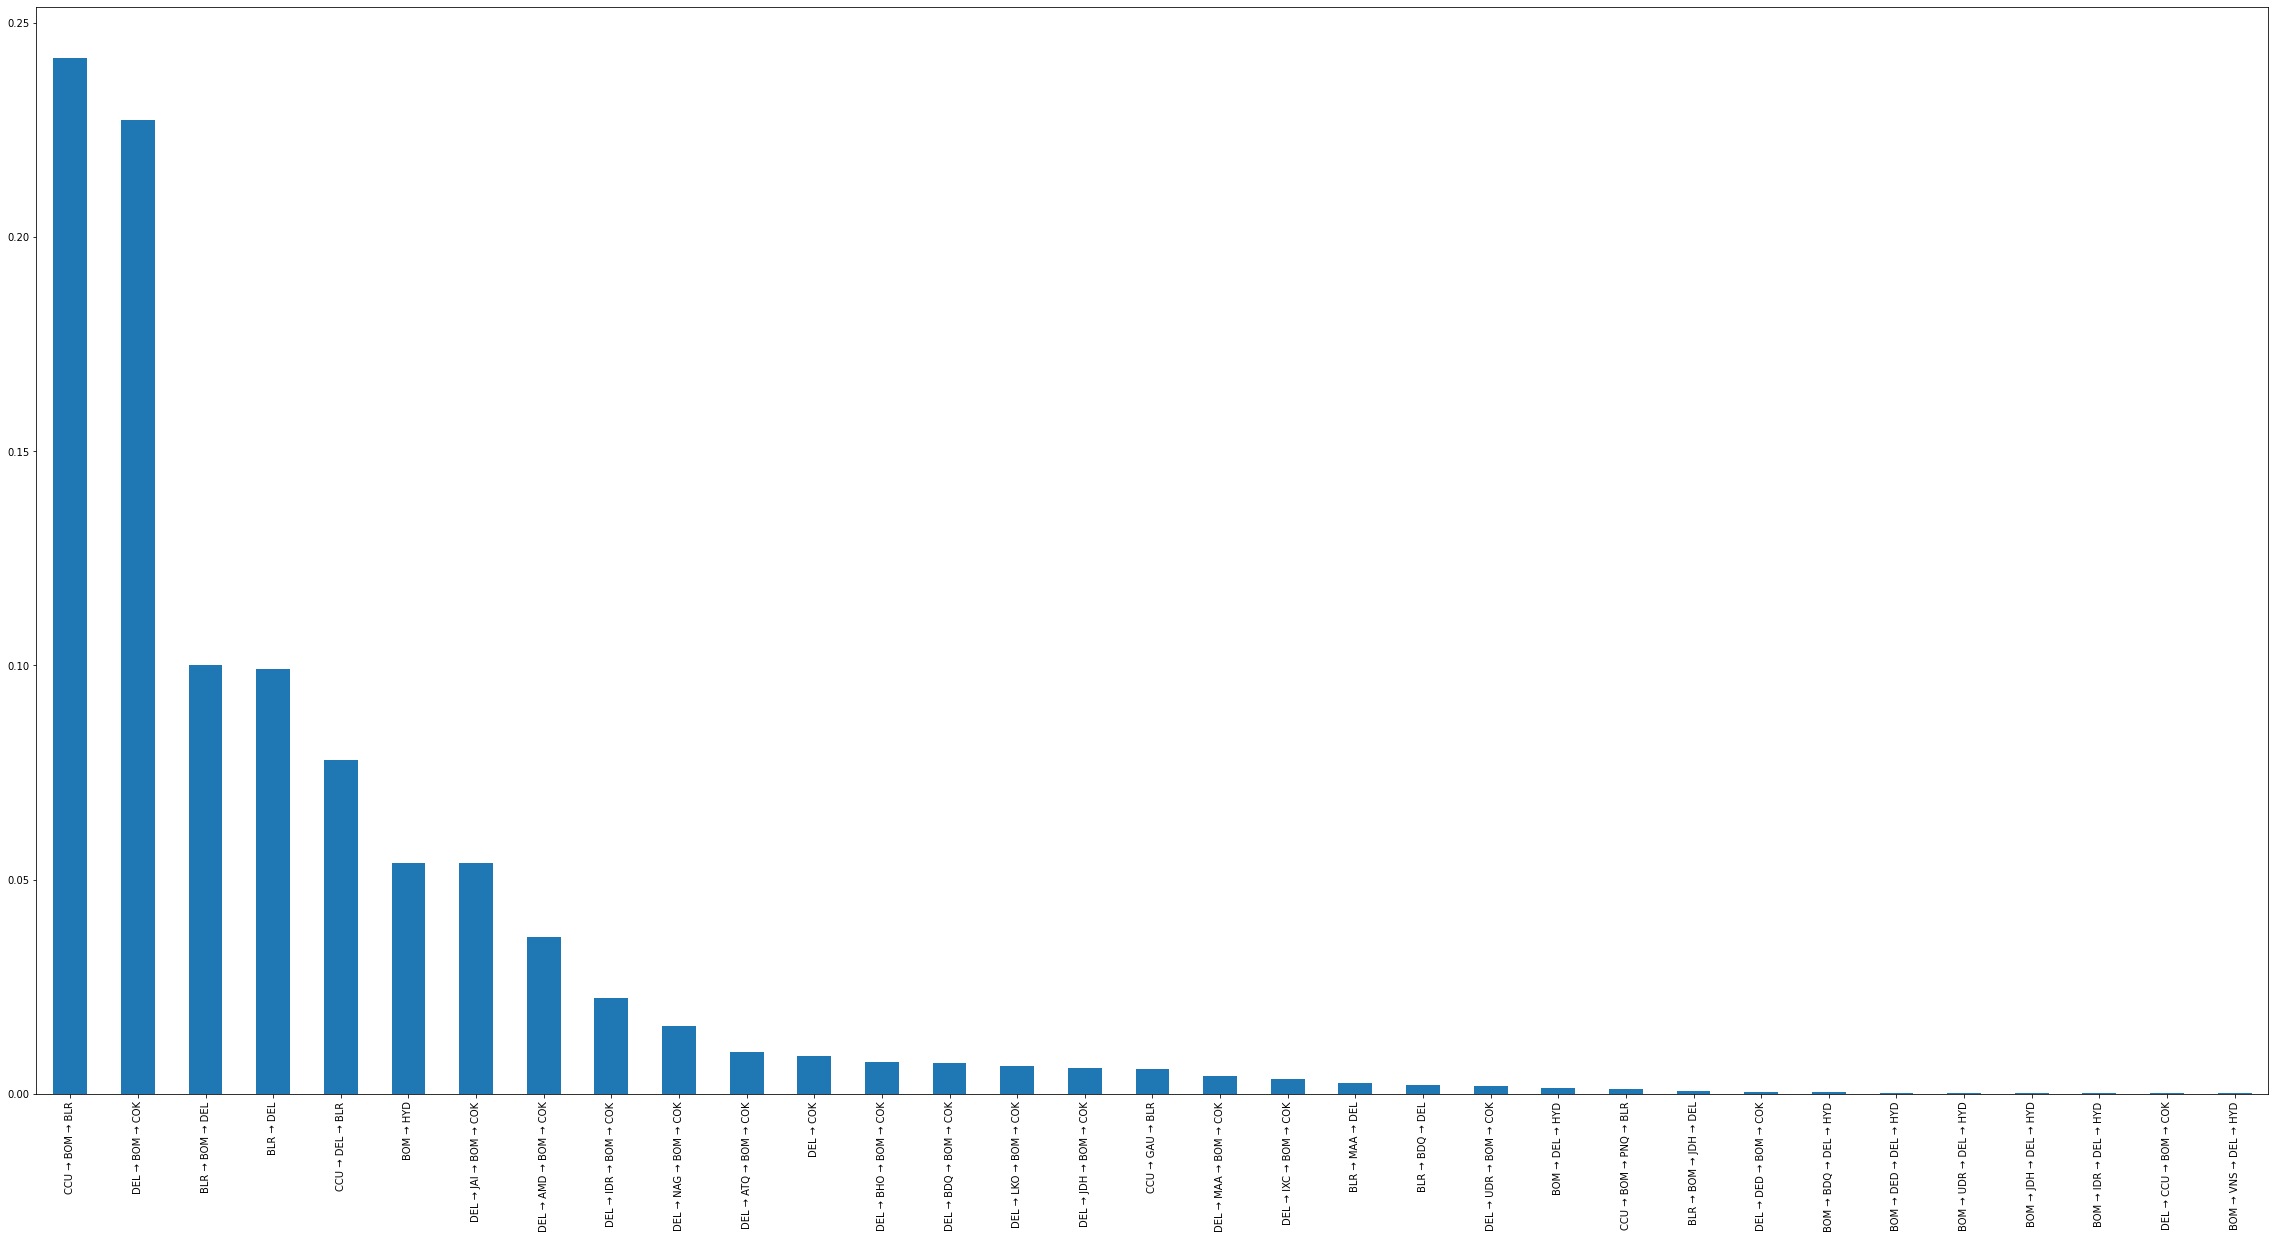

In [49]:
plt.figure(figsize=(40,20))
data[data['Airline']== 'Jet Airways']['Route'].value_counts(normalize=True).plot(kind='bar')

In [50]:
data['Airline'].unique()

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'], dtype=object)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'IndiGo'),
  Text(1, 0, 'Air India'),
  Text(2, 0, 'Jet Airways'),
  Text(3, 0, 'SpiceJet'),
  Text(4, 0, 'Multiple carriers'),
  Text(5, 0, 'GoAir'),
  Text(6, 0, 'Vistara'),
  Text(7, 0, 'Air Asia'),
  Text(8, 0, 'Vistara Premium economy'),
  Text(9, 0, 'Jet Airways Business'),
  Text(10, 0, 'Multiple carriers Premium economy'),
  Text(11, 0, 'Trujet')])

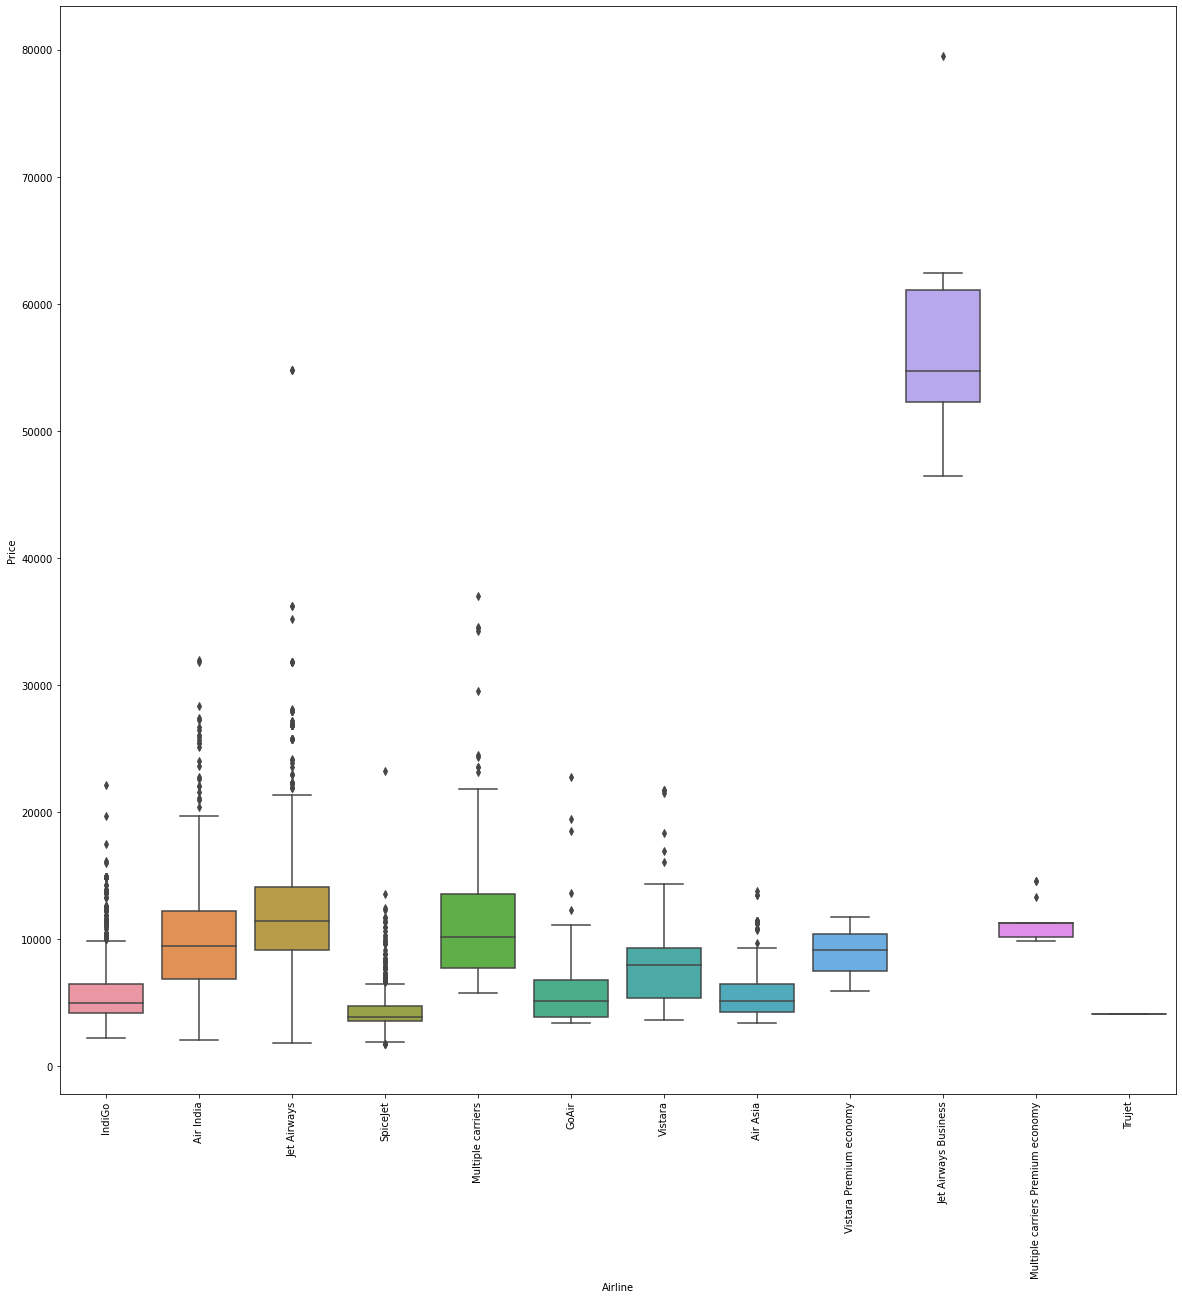

In [51]:
plt.figure(figsize=(20,20))
sns.boxplot(x='Airline', y='Price', data=data)
plt.xticks(rotation=90)

In [52]:
data.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,journey_year,journey_month,journey_day,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hour,Duration_min,Duration_total_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,2019,3,24,22,20,1,10,2,50,170
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,2019,1,5,5,50,13,15,7,25,445
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,2019,9,6,9,25,4,25,19,0,1140
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,2019,12,5,18,5,23,30,5,25,325
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,2019,1,3,16,50,21,35,4,45,285


In [53]:
del_cols = ['Route', 'Additional_Info', 'Duration_total_mins', 'journey_year']
data.drop(del_cols, axis=1, inplace=True)

In [54]:
data.head()

,Airline,Source,Destination,Total_Stops,Price,journey_month,journey_day,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hour,Duration_min
0,IndiGo,Banglore,New Delhi,non-stop,3897,3,24,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2 stops,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2 stops,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1 stop,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1 stop,13302,1,3,16,50,21,35,4,45


In [55]:
data['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [56]:
data.columns

Index(['Airline', 'Source', 'Destination', 'Total_Stops', 'Price',
       'journey_month', 'journey_day', 'Dep_Time_hour', 'Dep_Time_minute',
       'Arrival_Time_hour', 'Arrival_Time_minute', 'Duration_hour',
       'Duration_min'],
      dtype='object')

In [57]:
data.dtypes

Airline                object
Source                 object
Destination            object
Total_Stops            object
Price                   int64
journey_month           int64
journey_day             int64
Dep_Time_hour           int64
Dep_Time_minute         int64
Arrival_Time_hour       int64
Arrival_Time_minute     int64
Duration_hour           int64
Duration_min            int64
dtype: object

In [58]:
data['Source'].dtype

dtype('O')

In [59]:
cat_cols = [col for col in data.columns if data[col].dtype == 'object']
cat_cols

['Airline', 'Source', 'Destination', 'Total_Stops']

In [60]:
num_cols = [col for col in data.columns if data[col].dtype != 'object']
num_cols

['Price',
 'journey_month',
 'journey_day',
 'Dep_Time_hour',
 'Dep_Time_minute',
 'Arrival_Time_hour',
 'Arrival_Time_minute',
 'Duration_hour',
 'Duration_min']

In [61]:
data['Airline'].unique()

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'], dtype=object)

In [62]:
 data['Airline'].apply(lambda x: 1 if x=='IndiGo' else 0)

0        1
1        0
2        0
3        1
4        1
        ..
10678    0
10679    0
10680    0
10681    0
10682    0
Name: Airline, Length: 10682, dtype: int64

In [63]:
for col in cat_cols:
    for item in data[col].unique():
        data[col+'_'+item] = data[col].apply(lambda x: 1 if x==item else 0)

In [64]:
data.head()

,Airline,Source,Destination,Total_Stops,Price,journey_month,journey_day,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,...,Destination_Banglore,Destination_Cochin,Destination_Kolkata,Destination_Delhi,Destination_Hyderabad,Total_Stops_non-stop,Total_Stops_2 stops,Total_Stops_1 stop,Total_Stops_3 stops,Total_Stops_4 stops
0,IndiGo,Banglore,New Delhi,non-stop,3897,3,24,22,20,1,...,0,0,0,0,0,1,0,0,0,0
1,Air India,Kolkata,Banglore,2 stops,7662,1,5,5,50,13,...,1,0,0,0,0,0,1,0,0,0
2,Jet Airways,Delhi,Cochin,2 stops,13882,9,6,9,25,4,...,0,1,0,0,0,0,1,0,0,0
3,IndiGo,Kolkata,Banglore,1 stop,6218,12,5,18,5,23,...,1,0,0,0,0,0,0,1,0,0
4,IndiGo,Banglore,New Delhi,1 stop,13302,1,3,16,50,21,...,0,0,0,0,0,0,0,1,0,0


In [65]:
data.drop(['Total_Stops_non-stop','Total_Stops_2 stops', 'Total_Stops_1 stop', 'Total_Stops_4 stops' ], axis=1, inplace=True)

In [66]:
data.drop('Total_Stops_3 stops', axis=1, inplace=True)

In [67]:
def process_stops(x):
    stops = x.split(' ')[0]
    try:
        return int(stops)
    except:
        return 0

In [68]:
data['Total_Stops'] = data['Total_Stops'].apply(process_stops)

In [69]:
data.head()

,Airline,Source,Destination,Total_Stops,Price,journey_month,journey_day,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,...,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai,Destination_New Delhi,Destination_Banglore,Destination_Cochin,Destination_Kolkata,Destination_Delhi,Destination_Hyderabad
0,IndiGo,Banglore,New Delhi,0,3897,3,24,22,20,1,...,0,0,0,0,1,0,0,0,0,0
1,Air India,Kolkata,Banglore,2,7662,1,5,5,50,13,...,1,0,0,0,0,1,0,0,0,0
2,Jet Airways,Delhi,Cochin,2,13882,9,6,9,25,4,...,0,1,0,0,0,0,1,0,0,0
3,IndiGo,Kolkata,Banglore,1,6218,12,5,18,5,23,...,1,0,0,0,0,1,0,0,0,0
4,IndiGo,Banglore,New Delhi,1,13302,1,3,16,50,21,...,0,0,0,0,1,0,0,0,0,0


In [70]:
airline = data.groupby('Airline')['Price'].mean().sort_values().index

In [71]:
type(airline)

pandas.core.indexes.base.Index

In [72]:
airline_dict = {v: i for i, v in list(enumerate(airline))}

In [73]:
airline_dict

{'Trujet': 0,
 'SpiceJet': 1,
 'Air Asia': 2,
 'IndiGo': 3,
 'GoAir': 4,
 'Vistara': 5,
 'Vistara Premium economy': 6,
 'Air India': 7,
 'Multiple carriers': 8,
 'Multiple carriers Premium economy': 9,
 'Jet Airways': 10,
 'Jet Airways Business': 11}

In [74]:
data['Airline_te'] = data['Airline'].apply(lambda x: airline_dict[x])

In [75]:
data.head(2)

,Airline,Source,Destination,Total_Stops,Price,journey_month,journey_day,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,...,Source_Delhi,Source_Chennai,Source_Mumbai,Destination_New Delhi,Destination_Banglore,Destination_Cochin,Destination_Kolkata,Destination_Delhi,Destination_Hyderabad,Airline_te
0,IndiGo,Banglore,New Delhi,0,3897,3,24,22,20,1,...,0,0,0,1,0,0,0,0,0,3
1,Air India,Kolkata,Banglore,2,7662,1,5,5,50,13,...,0,0,0,0,1,0,0,0,0,7


In [76]:
data.groupby('Airline')['Price'].mean().sort_values(ascending=False)

Airline
Jet Airways Business                 58358.666667
Jet Airways                          11643.923357
Multiple carriers Premium economy    11418.846154
Multiple carriers                    10902.678094
Air India                             9612.427756
Vistara Premium economy               8962.333333
Vistara                               7796.348643
GoAir                                 5861.056701
IndiGo                                5673.682903
Air Asia                              5590.260188
SpiceJet                              4338.284841
Trujet                                4140.000000
Name: Price, dtype: float64

In [77]:
data.head()

,Airline,Source,Destination,Total_Stops,Price,journey_month,journey_day,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,...,Source_Delhi,Source_Chennai,Source_Mumbai,Destination_New Delhi,Destination_Banglore,Destination_Cochin,Destination_Kolkata,Destination_Delhi,Destination_Hyderabad,Airline_te
0,IndiGo,Banglore,New Delhi,0,3897,3,24,22,20,1,...,0,0,0,1,0,0,0,0,0,3
1,Air India,Kolkata,Banglore,2,7662,1,5,5,50,13,...,0,0,0,0,1,0,0,0,0,7
2,Jet Airways,Delhi,Cochin,2,13882,9,6,9,25,4,...,1,0,0,0,0,1,0,0,0,10
3,IndiGo,Kolkata,Banglore,1,6218,12,5,18,5,23,...,0,0,0,0,1,0,0,0,0,3
4,IndiGo,Banglore,New Delhi,1,13302,1,3,16,50,21,...,0,0,0,1,0,0,0,0,0,3


<AxesSubplot:xlabel='Price', ylabel='Count'>

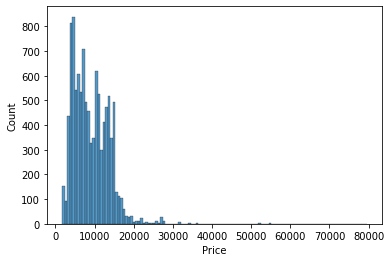

In [78]:
sns.histplot(data['Price'])

In [79]:
def plot(df, col):
    fig, (ax1, ax2, ax3) = plt.subplots(3,1)
    plt.figure(figsize=(40,10))
    sns.boxplot(df[col], ax=ax1)
    sns.distplot(df[col], ax=ax2)
    sns.distplot(df[col], ax=ax3, kde=False)
    

/usr/local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn

<Figure size 2880x1440 with 0 Axes>

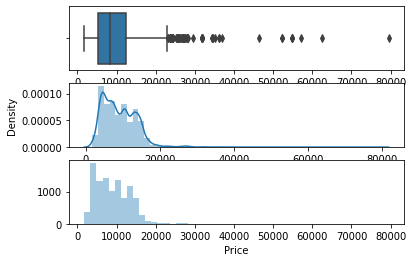

<Figure size 2880x720 with 0 Axes>

In [80]:
plt.figure(figsize=(40,20))
plot(data, 'Price')

In [81]:
data['Price'] = np.where(data['Price'] > 35000, data['Price'].median(), data['Price'])

/usr/local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn

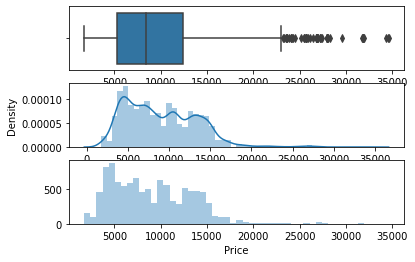

<Figure size 2880x720 with 0 Axes>

In [82]:
plot(data, 'Price')

In [83]:
data.head(3)

,Airline,Source,Destination,Total_Stops,Price,journey_month,journey_day,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,...,Source_Delhi,Source_Chennai,Source_Mumbai,Destination_New Delhi,Destination_Banglore,Destination_Cochin,Destination_Kolkata,Destination_Delhi,Destination_Hyderabad,Airline_te
0,IndiGo,Banglore,New Delhi,0,3897.0,3,24,22,20,1,...,0,0,0,1,0,0,0,0,0,3
1,Air India,Kolkata,Banglore,2,7662.0,1,5,5,50,13,...,0,0,0,0,1,0,0,0,0,7
2,Jet Airways,Delhi,Cochin,2,13882.0,9,6,9,25,4,...,1,0,0,0,0,1,0,0,0,10


In [84]:
data.drop(columns=['Airline', 'Source', 'Destination'], axis=1, inplace=True)

In [85]:
data.head(2)

,Total_Stops,Price,journey_month,journey_day,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hour,Duration_min,...,Source_Delhi,Source_Chennai,Source_Mumbai,Destination_New Delhi,Destination_Banglore,Destination_Cochin,Destination_Kolkata,Destination_Delhi,Destination_Hyderabad,Airline_te
0,0,3897.0,3,24,22,20,1,10,2,50,...,0,0,0,1,0,0,0,0,0,3
1,2,7662.0,1,5,5,50,13,15,7,25,...,0,0,0,0,1,0,0,0,0,7


In [86]:
data.dtypes

Total_Stops                                    int64
Price                                        float64
journey_month                                  int64
journey_day                                    int64
Dep_Time_hour                                  int64
Dep_Time_minute                                int64
Arrival_Time_hour                              int64
Arrival_Time_minute                            int64
Duration_hour                                  int64
Duration_min                                   int64
Airline_IndiGo                                 int64
Airline_Air India                              int64
Airline_Jet Airways                            int64
Airline_SpiceJet                               int64
Airline_Multiple carriers                      int64
Airline_GoAir                                  int64
Airline_Vistara                                int64
Airline_Air Asia                               int64
Airline_Vistara Premium economy               

In [87]:
data['Destination'] = df['Destination']

In [88]:
data.loc[df['Destination'] == 'New Delhi', 'Destination'] ='Delhi'

In [89]:
dest = list(data.groupby('Destination')['Price'].mean().sort_values(ascending=True).index)
dest

['Kolkata', 'Hyderabad', 'Delhi', 'Banglore', 'Cochin']

In [90]:
dict1 = {k: i for i, k in enumerate(dest, 0)}
dict1

{'Kolkata': 0, 'Hyderabad': 1, 'Delhi': 2, 'Banglore': 3, 'Cochin': 4}

In [91]:
data['Destination'] = data['Destination'].map(lambda x: dict1[x])
data['Destination']

0        2
1        3
2        4
3        3
4        2
        ..
10678    3
10679    3
10680    2
10681    2
10682    4
Name: Destination, Length: 10682, dtype: int64

In [92]:
data.columns

Index(['Total_Stops', 'Price', 'journey_month', 'journey_day', 'Dep_Time_hour',
       'Dep_Time_minute', 'Arrival_Time_hour', 'Arrival_Time_minute',
       'Duration_hour', 'Duration_min', 'Airline_IndiGo', 'Airline_Air India',
       'Airline_Jet Airways', 'Airline_SpiceJet', 'Airline_Multiple carriers',
       'Airline_GoAir', 'Airline_Vistara', 'Airline_Air Asia',
       'Airline_Vistara Premium economy', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers Premium economy', 'Airline_Trujet',
       'Source_Banglore', 'Source_Kolkata', 'Source_Delhi', 'Source_Chennai',
       'Source_Mumbai', 'Destination_New Delhi', 'Destination_Banglore',
       'Destination_Cochin', 'Destination_Kolkata', 'Destination_Delhi',
       'Destination_Hyderabad', 'Airline_te', 'Destination'],
      dtype='object')

In [93]:
data.drop(columns=['Destination_Cochin', 'Destination_New Delhi', 'Destination_Banglore', 'Destination_Delhi', 'Destination_Kolkata', 'Destination_Hyderabad'], axis=1, inplace=True)





In [94]:
from sklearn.feature_selection import mutual_info_regression

In [95]:
X = data.drop(columns=['Price'], axis=1)

In [96]:
y = data['Price']

In [97]:
feature_imp_score = pd.DataFrame(mutual_info_regression(X, y), index=X.columns)
feature_imp_score.columns = ['importance']

In [98]:
feature_imp_score.sort_values(by='importance',ascending=False)

,importance
Destination,1.009384
Airline_te,0.972363
Total_Stops,0.786752
Airline_Jet Airways,0.550137
Source_Delhi,0.519543
Duration_hour,0.463385
Source_Kolkata,0.461052
Arrival_Time_hour,0.400051
Source_Banglore,0.385319
Airline_IndiGo,0.352386


In [7]:
import pandas as pd
s = pd.Series(list('abcz'))
s


0    a
1    b
2    c
3    z
dtype: object

In [32]:
s1 = s.map(lambda x: x.upper())
s1

0    A
1    B
2    C
3    Z
dtype: object

In [30]:
poss = [7,8,9]
char_to_int = dict((i,j) for i, j in enumerate(poss)) 

In [31]:
char_to_int

{0: 7, 1: 8, 2: 9}